In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [2]:
os.chdir(r"C:\\Users\\rgoulika\\Downloads")

In [3]:
attrition_data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

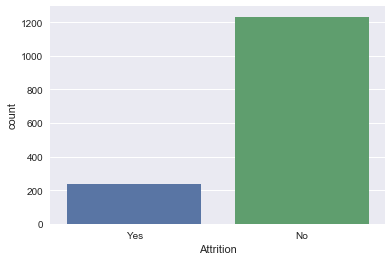

In [5]:
#Get the actual number of employees who have left(Yes) and Who haven't(No)
sns.countplot(x='Attrition',data=attrition_data)

In [8]:
attrition_data.groupby(['Attrition']).size().reset_index()

,Attrition,0
0,No,1233
1,Yes,237


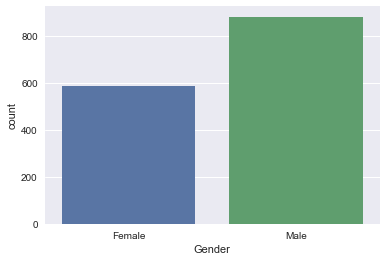

In [12]:
#There are totally 237 people who have left and 1233 who haven't left.
sns.countplot(x='Gender',data=attrition_data)

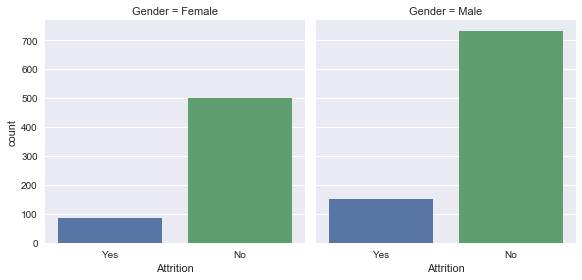

In [13]:
sns.factorplot(x='Attrition',col='Gender',kind='count',data=attrition_data)

In [14]:
from matplotlib.pyplot import pie,axis,show

In [18]:
attrition_data['Attrition_Numeric']=attrition_data['Attrition'].replace(['Yes','No'],[1,0])

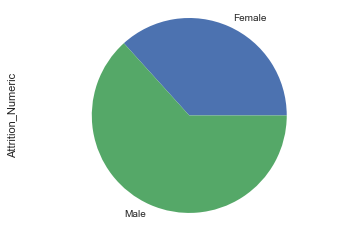

In [22]:
#Below Pie chart clearly shows that Males are more prone to leave the Organization when compared to Females.
attrition_data.Attrition_Numeric.groupby(attrition_data.Gender).sum().plot(kind='pie')
axis('equal');
show()

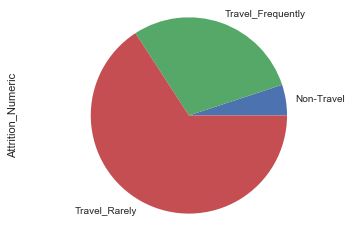

In [34]:
#Below Pie chart clearly shows that Employees who Travel Rarely are more in number who have left the organization.
attrition_data.Attrition_Numeric.groupby(attrition_data.BusinessTravel).sum().plot(kind='pie')
axis('equal');
show()

In [40]:
BT = pd.crosstab(index=attrition_data["Attrition"], 
                           columns=attrition_data["BusinessTravel"],margins=True)

In [41]:
BT.columns=['Non-Travel','Travel_Frequently','Travel_Rarely','RowTotal']
BT.index=['No','Yes','ColTotal']

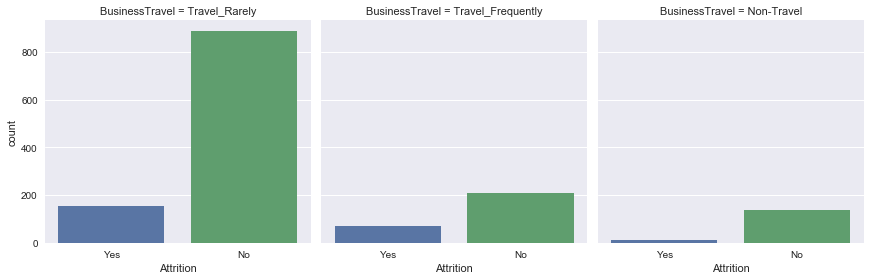

In [47]:
sns.factorplot(x='Attrition', col='BusinessTravel', kind='count', data=attrition_data);

In [46]:
#From above as we have employee who travel rarely have left the organization but in the percent of employees who left the organization
#are more in Travel_Freqently category. So employees who travel frequently tend to leave organization.
BT/BT.loc["ColTotal"] * 100

,Non-Travel,Travel_Frequently,Travel_Rarely,RowTotal
No,92.0,75.090253,85.043145,83.877551
Yes,8.0,24.909747,14.956855,16.122449
ColTotal,100.0,100.000000,100.000000,100.000000


Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DailyRate, dtype: object

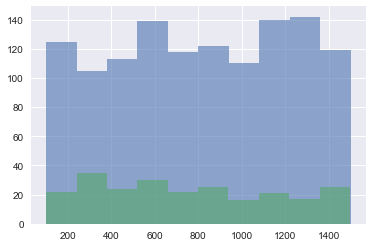

In [48]:
attrition_data.groupby('Attrition').DailyRate.hist(alpha=0.6)

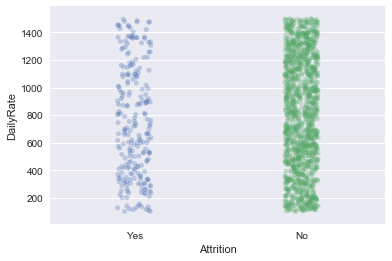

In [50]:
sns.stripplot(x='Attrition',y='DailyRate',data=attrition_data,alpha=0.3,jitter=True)

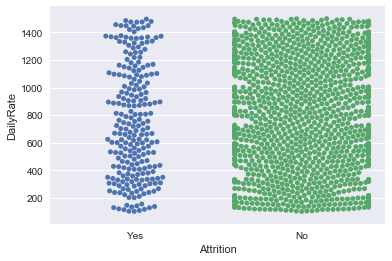

In [51]:
#From below plot it shows that DailyRate is correlated to Attrition. Employees whose rate is low tend to leave the Organization
sns.swarmplot(x='Attrition',y='DailyRate',data=attrition_data)

In [52]:
attrition_data.groupby('Attrition').DailyRate.describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
Yes,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0


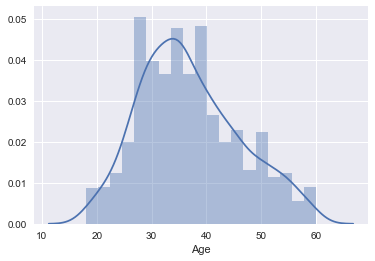

In [56]:
sns.distplot(attrition_data.Age)

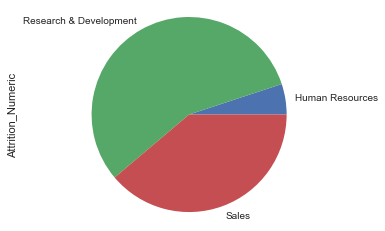

In [58]:
#Below Pie chart clearly shows that Employees who Travel Rarely are more in number who have left the organization.
attrition_data.Attrition_Numeric.groupby(attrition_data.Department).sum().plot(kind='pie')
axis('equal');
show()

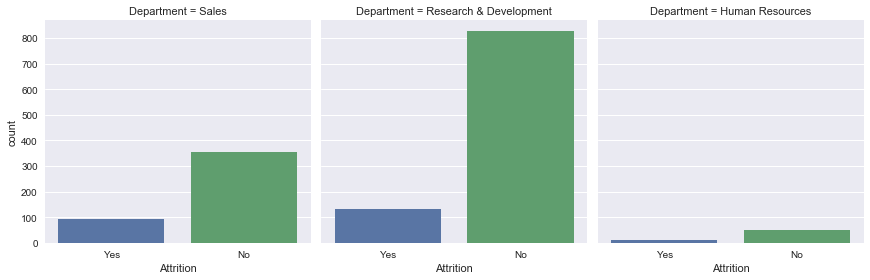

In [59]:
sns.factorplot(x='Attrition',col='Department',data=attrition_data,kind='count')

In [63]:
dept = pd.crosstab(index=attrition_data["Attrition"], 
                           columns=attrition_data["Department"],margins=True)
dept.columns=dept.T.index
dept.index=['No','Yes','ColTotal']
dept=dept/dept.loc["ColTotal"] * 100
print(dept)

Department  Human Resources  Research & Development       Sales         All
No                80.952381                86.16025   79.372197   83.877551
Yes               19.047619                13.83975   20.627803   16.122449
ColTotal         100.000000               100.00000  100.000000  100.000000


In [64]:
#The above analysis proves that almost all the departments has approximately 
#same Attrition Percentage. Human Resources and Sales is on higher side.

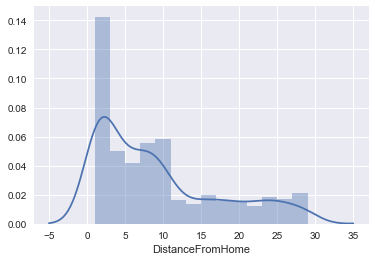

In [66]:
sns.distplot(attrition_data.DistanceFromHome)

In [69]:
#From below plots employees who stayed in lesser Distance from work left the Organization.

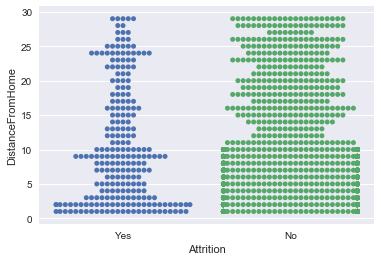

In [67]:
sns.swarmplot(x='Attrition',y='DistanceFromHome',data=attrition_data)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DistanceFromHome, dtype: object

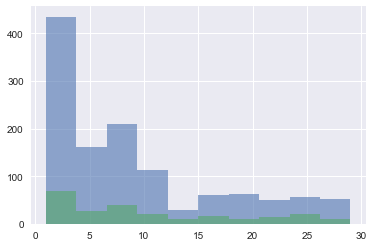

In [68]:
attrition_data.groupby('Attrition').DistanceFromHome.hist(alpha=0.6)

In [40]:
education = pd.crosstab(index=attrition_data["Attrition"], 
                           columns=attrition_data["Education"],margins=True)
education.columns=education.T.index
education.index=['No','Yes','ColTotal']
education=education/education.loc["ColTotal"] * 100
print(education)

Education           1           2           3           4           5  \
No          81.764706   84.397163   82.692308   85.427136   89.583333   
Yes         18.235294   15.602837   17.307692   14.572864   10.416667   
ColTotal   100.000000  100.000000  100.000000  100.000000  100.000000   

Education         All  
No          83.877551  
Yes         16.122449  
ColTotal   100.000000  


In [26]:
education.iloc[1,0:5].values

array([31, 44, 99, 58,  5], dtype=int64)

In [30]:
education.columns[0:5]

Index([1, 2, 3, 4, 5], dtype='object', name='Education')

In [37]:
education.T

,No,Yes,ColTotal
Education,,,
1,139,31,170
2,238,44,282
3,473,99,572
4,340,58,398
5,43,5,48
All,1233,237,1470


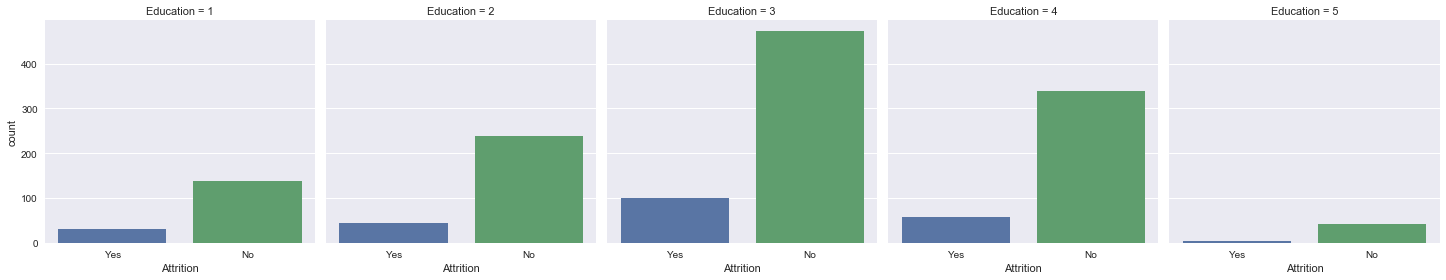

In [38]:
sns.factorplot(x='Attrition', col='Education', kind='count', data=attrition_data);

In [41]:
education = pd.crosstab(index=attrition_data["Attrition"], 
                           columns=attrition_data["Education"],margins=True)
education.columns=education.T.index
education.index=['No','Yes','ColTotal']
education=education/education.loc["ColTotal"] * 100
print(education)

Education           1           2           3           4           5  \
No          81.764706   84.397163   82.692308   85.427136   89.583333   
Yes         18.235294   15.602837   17.307692   14.572864   10.416667   
ColTotal   100.000000  100.000000  100.000000  100.000000  100.000000   

Education         All  
No          83.877551  
Yes         16.122449  
ColTotal   100.000000  


In [42]:
#Education level has equal spread across all Education Types

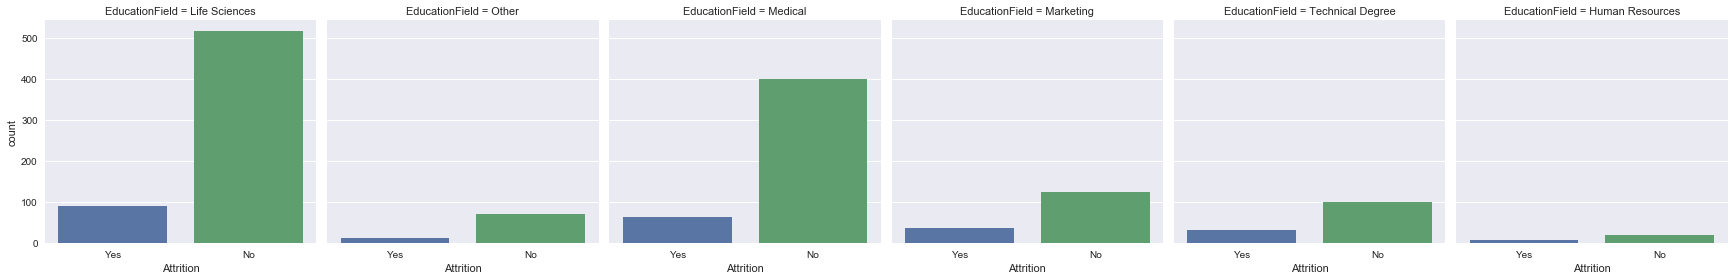

In [46]:
plt.figure(figsize=(40,20))
sns.factorplot(x='Attrition', col='EducationField', kind='count', data=attrition_data);

In [47]:
educationfield = pd.crosstab(index=attrition_data["Attrition"], 
                           columns=attrition_data["EducationField"],margins=True)
educationfield.columns=educationfield.T.index
educationfield.index=['No','Yes','ColTotal']
educationfield=educationfield/educationfield.loc["ColTotal"] * 100
print(educationfield)

EducationField  Human Resources  Life Sciences   Marketing     Medical  \
No                    74.074074      85.313531   77.987421   86.422414   
Yes                   25.925926      14.686469   22.012579   13.577586   
ColTotal             100.000000     100.000000  100.000000  100.000000   

EducationField       Other  Technical Degree         All  
No               86.585366         75.757576   83.877551  
Yes              13.414634         24.242424   16.122449  
ColTotal        100.000000        100.000000  100.000000  


In [49]:
#From above statistics Human Resources, Marketing, Technical Degree people leave the organization when compared to other EducationField.
#EmployeeCount and EmployeeNumber can be ignored.

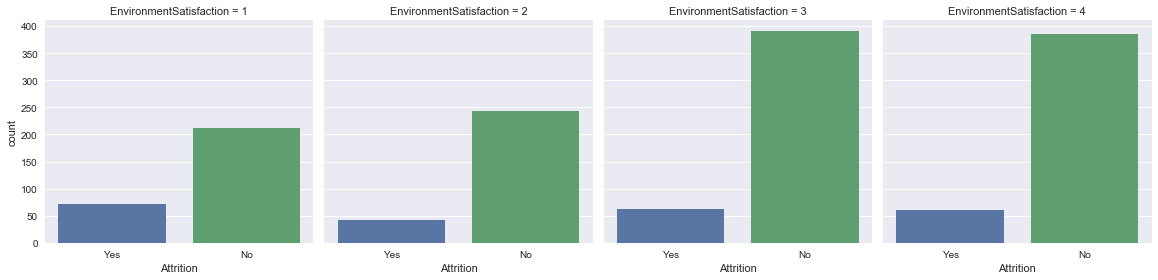

In [53]:
#From below plots its obvious Employees with EnvironmentSatisfaction will leave organization.
sns.factorplot(x='Attrition',col='EnvironmentSatisfaction',data=attrition_data,kind='count')

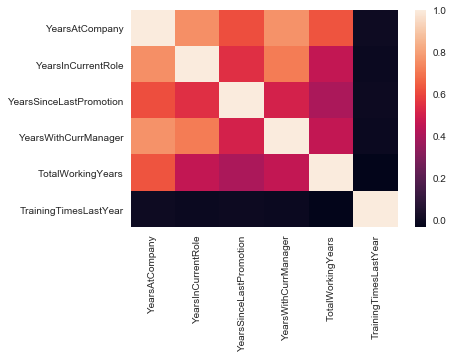

In [54]:
# Calculate and plot
corr_matrix = attrition_data[['YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager',
'TotalWorkingYears',
'TrainingTimesLastYear']].corr()
sns.heatmap(corr_matrix);

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: YearsAtCompany, dtype: object

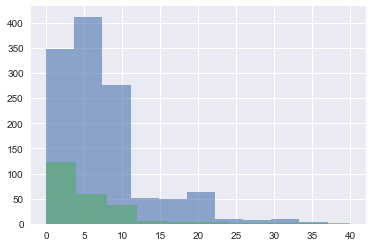

In [55]:
#From below plot employees with less years at company have high attrition
attrition_data.groupby('Attrition').YearsAtCompany.hist(alpha=0.6)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: YearsInCurrentRole, dtype: object

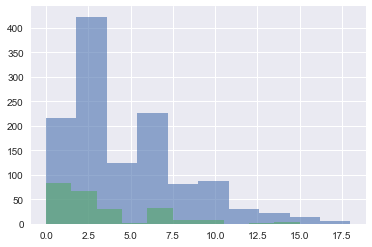

In [56]:
attrition_data.groupby('Attrition').YearsInCurrentRole.hist(alpha=0.6)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: YearsSinceLastPromotion, dtype: object

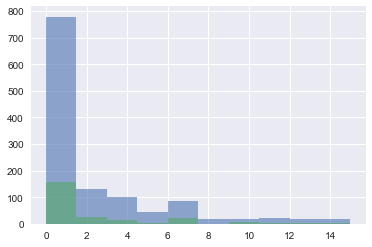

In [57]:
#From below plot employees recently promoted in the company have high attrition
attrition_data.groupby('Attrition').YearsSinceLastPromotion.hist(alpha=0.6)

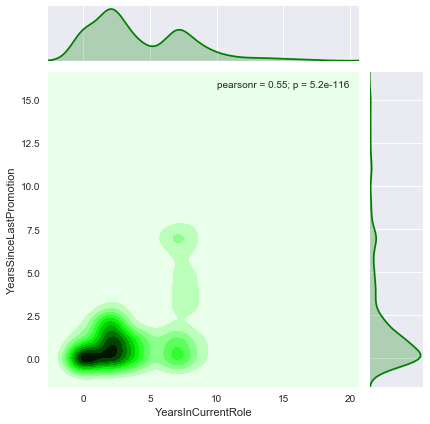

In [61]:
sns.jointplot(data=attrition_data,x='YearsInCurrentRole',y='YearsSinceLastPromotion',kind='kde',color='g')

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: YearsWithCurrManager, dtype: object

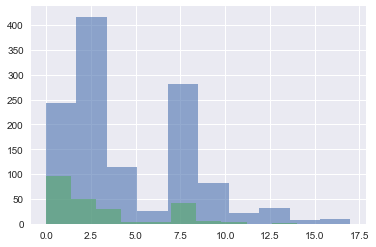

In [58]:
attrition_data.groupby('Attrition').YearsWithCurrManager.hist(alpha=0.6)

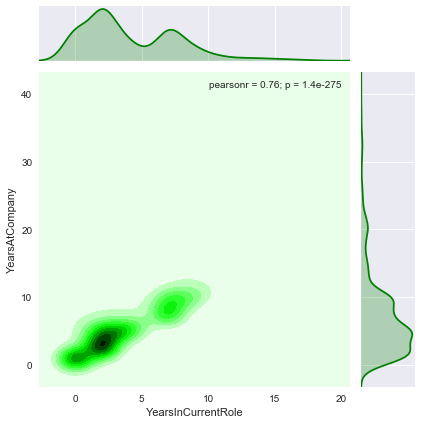

In [63]:
sns.jointplot(data=attrition_data,x='YearsInCurrentRole',y='YearsAtCompany',kind='kde',color='g')

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: YearsAtCompany, dtype: object

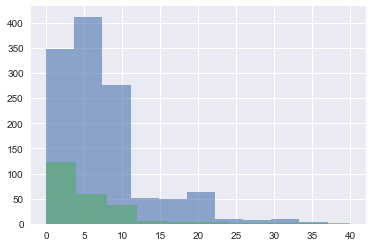

In [64]:
attrition_data.groupby('Attrition').YearsAtCompany.hist(alpha=0.6)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TrainingTimesLastYear, dtype: object

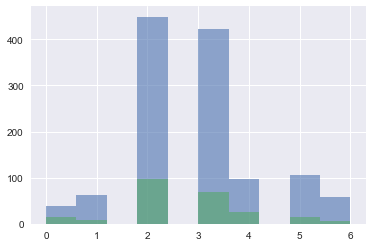

In [65]:
attrition_data.groupby('Attrition').TrainingTimesLastYear.hist(alpha=0.6)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TotalWorkingYears, dtype: object

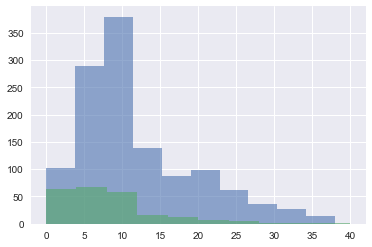

In [66]:
attrition_data.groupby('Attrition').TotalWorkingYears.hist(alpha=0.6)

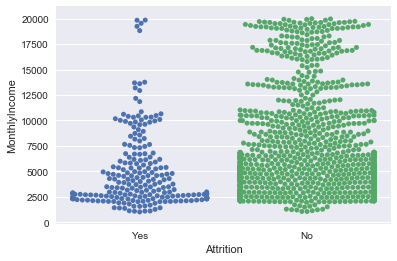

In [67]:
#Employees with Low incomes tend to leave and MonthlyIncome is a strong factor
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=attrition_data)

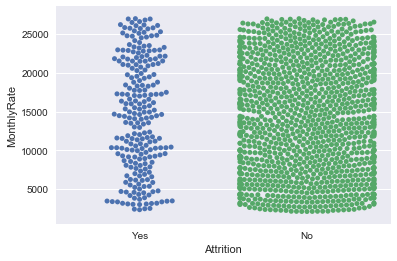

In [68]:

sns.swarmplot(x='Attrition',y='MonthlyRate',data=attrition_data)

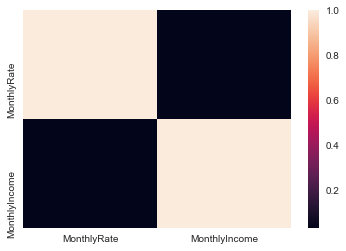

In [69]:
# Calculate and plot
corr_matrix = attrition_data[['MonthlyRate',
'MonthlyIncome']].corr()
sns.heatmap(corr_matrix);

In [74]:
pr=attrition_data.groupby(['PerformanceRating','Attrition']).size().reset_index()

In [75]:
pr.columns

Index(['PerformanceRating', 'Attrition', 0], dtype='object')

In [76]:
pr

,PerformanceRating,Attrition,0
0,3,No,1044
1,3,Yes,200
2,4,No,189
3,4,Yes,37


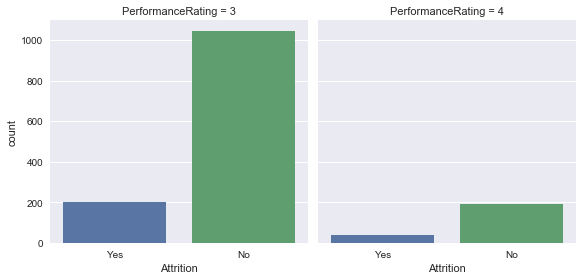

In [85]:
#As we can see from below plot performance rating is not impacting much. Both high performers as well as low performers leave at same rate.
sns.factorplot(x='Attrition',col='PerformanceRating',data=attrition_data,kind='count')

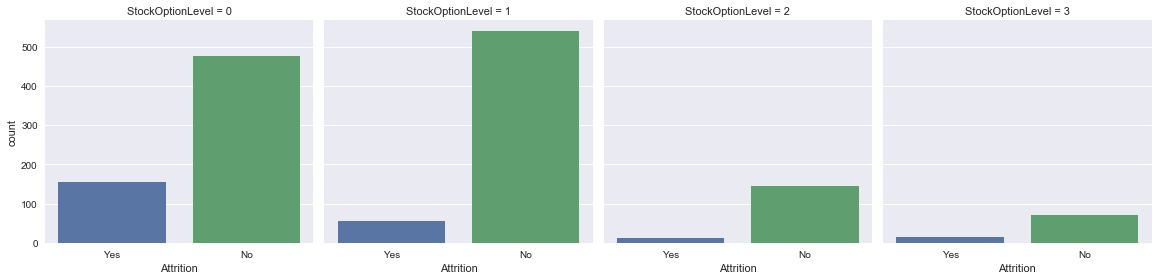

In [87]:
#As we can see StockOptionLevel = 0 has high probability of employee leaving the company
sns.factorplot(x='Attrition',col='StockOptionLevel',data=attrition_data,kind='count')

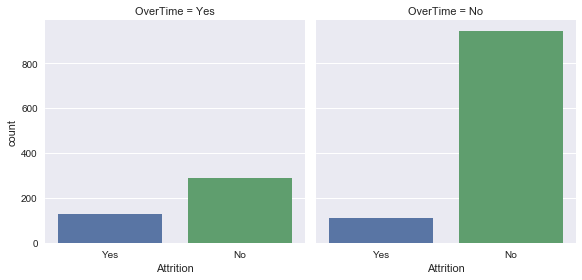

In [88]:
#Employees working overtime will leave org
sns.factorplot(x='Attrition',col='OverTime',data=attrition_data,kind='count')

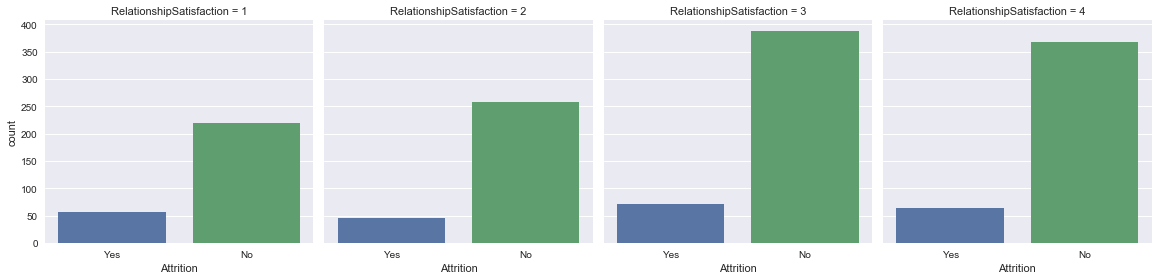

In [89]:
#Lower RelationShipSatisfaction higher the chance that Employee will leave.
sns.factorplot(x='Attrition',col='RelationshipSatisfaction',data=attrition_data,kind='count')

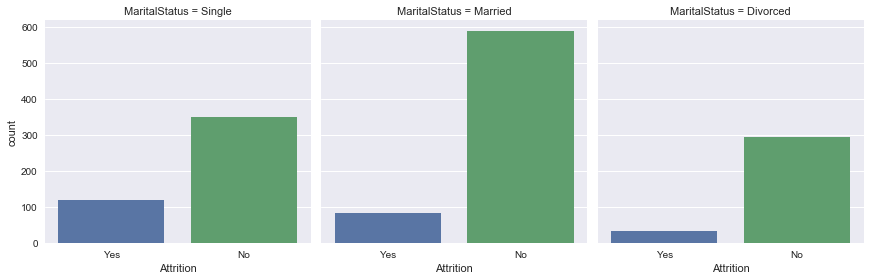

In [90]:
#Clearly Single Guys will have higher chance to leave Organization
sns.factorplot(x='Attrition',col='MaritalStatus',data=attrition_data,kind='count')

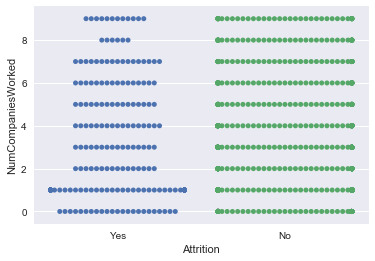

In [91]:
sns.swarmplot(x='Attrition',y='NumCompaniesWorked',data=attrition_data)

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NumCompaniesWorked, dtype: object

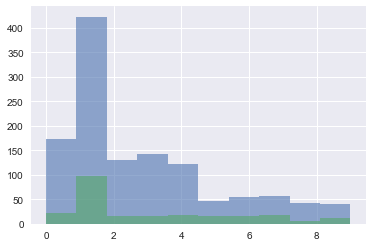

In [92]:
#The lesser the number of companies worked higher the chance of attrition.
attrition_data.groupby('Attrition').NumCompaniesWorked.hist(alpha=0.6)

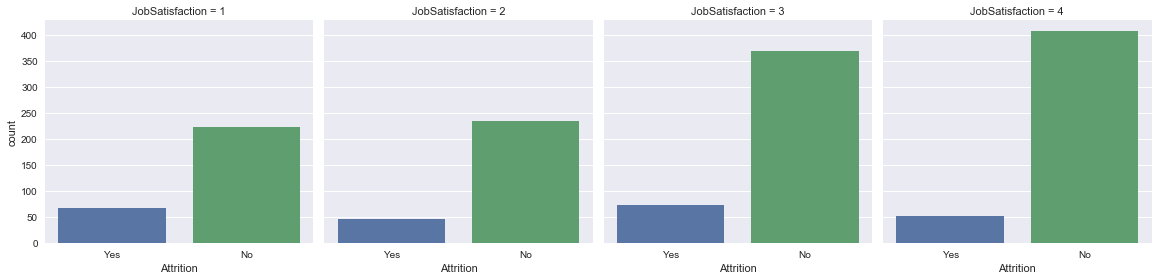

In [93]:
#Quite Obvious Lesser Job Satisfaction leading to attrition
sns.factorplot(x='Attrition',col='JobSatisfaction',data=attrition_data,kind='count')

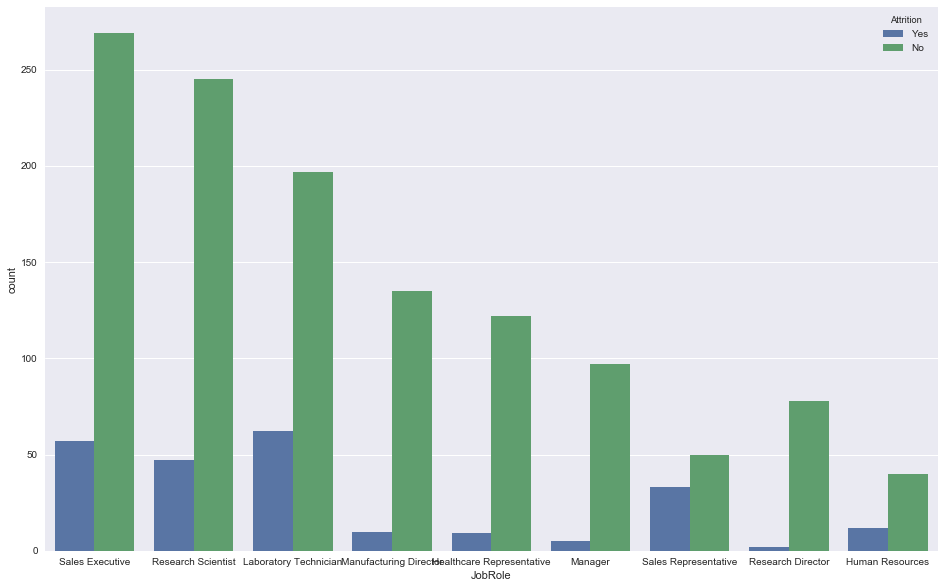

In [100]:
#High Attrition in LaboratoryTechnician&Sales Representative JobRole
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(data=attrition_data,x='JobRole',hue='Attrition')

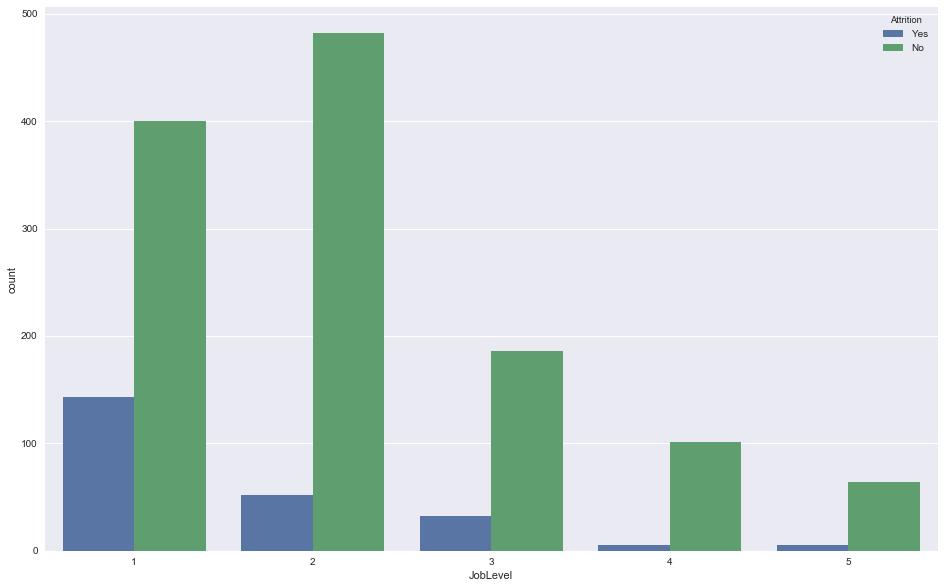

In [102]:
#Cant decide if JobLevel has any significance on Attrition
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(data=attrition_data,x='JobLevel',hue='Attrition')

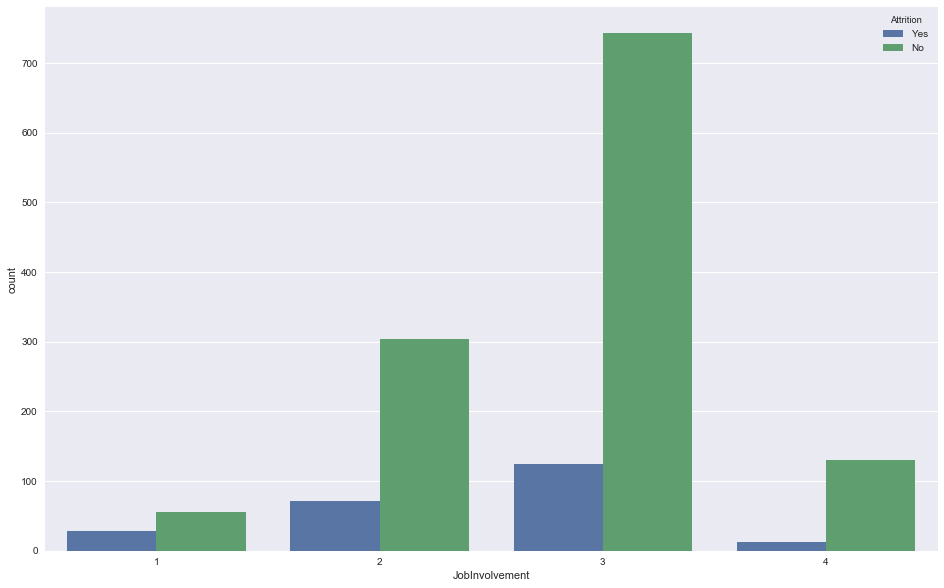

In [103]:
#Lesser JobInvolvement leading to high attrition
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(data=attrition_data,x='JobInvolvement',hue='Attrition')

Attrition
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HourlyRate, dtype: object

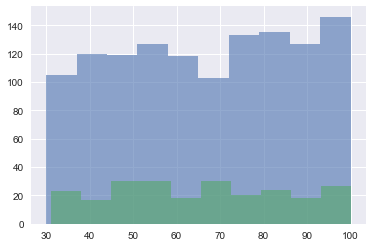

In [104]:
#HourlyRate Doesnt prove any impact
attrition_data.groupby('Attrition').HourlyRate.hist(alpha=0.6)